#                          FOOD PRODUCTION AND CONSUMPTION ANALYSIS IN AFRICA

Aim: In this project we will be analyzing Africa's food production and supply to gain insights on how food shortage problem can be solved and understand trends of food production and supply over ten years.

Dataset Description: There are two different datasets to be used in this project which were obtained from Food Agricultural Organizations(FAO). Africa Food production dataset which consist of 23110 rows and 4 columns (country, item, year and value(measured in metric kiliton quantity)) from 2004 to 2013. There are 45 unique country and 94 unique item. Africa food supply dataset which consist of 450 rows and 3 columns (country, year and value)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

#                DATA GATHERING

In [3]:
#read Africa Food production dataset to dataframe
df_p = pd.read_csv('Africa Food Production (2004 - 2013).csv')
pd.set_option('display.max_rows', 500)
df_p

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111
...,...,...,...,...
23105,Zimbabwe,Crustaceans,2009,0
23106,Zimbabwe,Crustaceans,2010,0
23107,Zimbabwe,Crustaceans,2011,0
23108,Zimbabwe,Crustaceans,2012,0


#           DATA PREPARATION

In [5]:
#inspect dataframe
unique = df_p.nunique()
print(unique)

Country      45
Item         94
Year         10
Value      2134
dtype: int64


                  Observations:From the above output, there are unique 45 countries and 94 items produced within the span of 10 years.

In [6]:
df_p.describe(include = 'all')

,Country,Item,Year,Value
count,23110,23110,23110.000000,23110.000000
unique,45,94,NaN,NaN
top,United Republic of Tanzania,Milk - Excluding Butter,NaN,NaN
freq,790,450,NaN,NaN
mean,NaN,NaN,2008.498269,327.785201
std,NaN,NaN,2.871740,1607.940343
min,NaN,NaN,2004.000000,0.000000
25%,NaN,NaN,2006.000000,3.000000
50%,NaN,NaN,2008.000000,18.000000
75%,NaN,NaN,2011.000000,108.000000


In [7]:
shape = df_p.shape
print(shape)

(23110, 4)


In [8]:
#checking dataframe info
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB


In [19]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Country    23110 non-null  object        
 1   Item       23110 non-null  object        
 2   Year       23110 non-null  datetime64[ns]
 3   Value(kt)  23110 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 722.3+ KB


In [20]:
df_p

,Country,Item,Year,Value(kt)
0,Algeria,Wheat and products,2004-01-01,2731
1,Algeria,Wheat and products,2005-01-01,2415
2,Algeria,Wheat and products,2006-01-01,2688
3,Algeria,Wheat and products,2007-01-01,2319
4,Algeria,Wheat and products,2008-01-01,1111
...,...,...,...,...
23105,Zimbabwe,Crustaceans,2009-01-01,0
23106,Zimbabwe,Crustaceans,2010-01-01,0
23107,Zimbabwe,Crustaceans,2011-01-01,0
23108,Zimbabwe,Crustaceans,2012-01-01,0


        DATA CLEANING
Every dataset requires cleaning and right now we will be cleaning our data by checking for missing values and duplicate values.

In [12]:
#checking for missing values
missing = df_p.isnull().sum()
print(missing)

Country      0
Item         0
Year         0
Value(kt)    0
dtype: int64


In [13]:
#checking for duplicates
duplicates = df_p.duplicated().sum()
print(duplicates)

0


In [5]:
#convert Year column to a dateobject and make the Value column to be recognized by metric kiloton(kt)
df_p['Year'] = pd.to_datetime(df_p['Year'], format = '%Y')
df_p.rename(columns = {'Value': 'Value(kt)'}, inplace = True)

#             ANALYSIS

## Q1: What is the Average food production between 2004-2013?

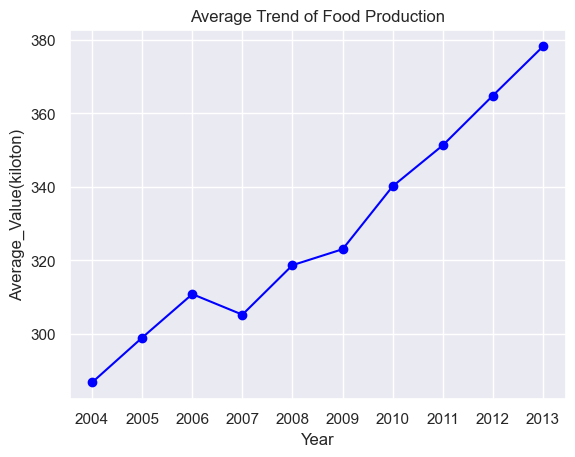

In [9]:
trend = df_p.groupby('Year')['Value(kt)'].mean().reset_index(name='Value(kt)')
trend
plt.plot(trend['Year'], trend['Value(kt)'], marker = 'o', color = 'blue')
plt.xlabel('Year')
plt.ylabel('Average_Value(kiloton)')
plt.title('Average Trend of Food Production')
plt.savefig('foodtrend.png', bbox_inches='tight', dpi=300)
plt.show()

                            Observation:From the trend analysis above, we can find that 2004-2006 had a steady increase and
                            in 2007, there was dip in food production which increased in 2008 and had a slight dip in 2009                                               and from 2010, there have been a steady increase of food production till 2013.

## Q2: Which countries produced the highest and least food items?

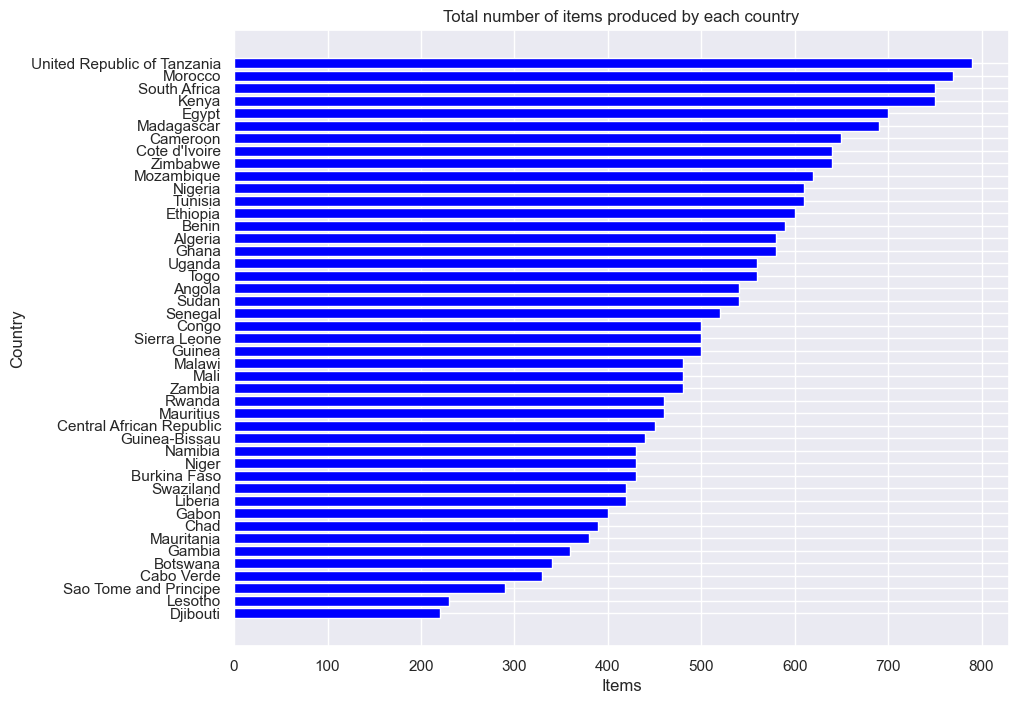

                        Country  count
0                      Djibouti    220
1                       Lesotho    230
2         Sao Tome and Principe    290
3                    Cabo Verde    330
4                      Botswana    340
5                        Gambia    360
6                    Mauritania    380
7                          Chad    390
8                         Gabon    400
9                       Liberia    420
10                    Swaziland    420
11                 Burkina Faso    430
12                        Niger    430
13                      Namibia    430
14                Guinea-Bissau    440
15     Central African Republic    450
16                    Mauritius    460
17                       Rwanda    460
18                       Zambia    480
19                         Mali    480
20                       Malawi    480
21                       Guinea    500
22                 Sierra Leone    500
23                        Congo    500
24                      S

In [8]:
#find the count of items produced by each unique country
item_count = df_p.groupby('Country')['Item'].count().sort_values(ascending = True).reset_index(name = 'count')
plt.figure (figsize = [10, 8])
plt.barh(item_count['Country'], item_count['count'], color = 'blue')
plt.xlabel('Items')
plt.ylabel('Country')
plt.title('Total number of items produced by each country')
plt.savefig('totalfood.png', bbox_inches='tight', dpi=300)
plt.show()
print(item_count)

                                        Observation: From the above output, United Republic of Tanzania produced the higest                                                       food items by 790 items while Djibouti produces the least items by 220 items.

To make our analysis clear we would find the top ten and least ten producing countries by items to aid a better understanding and clearer view

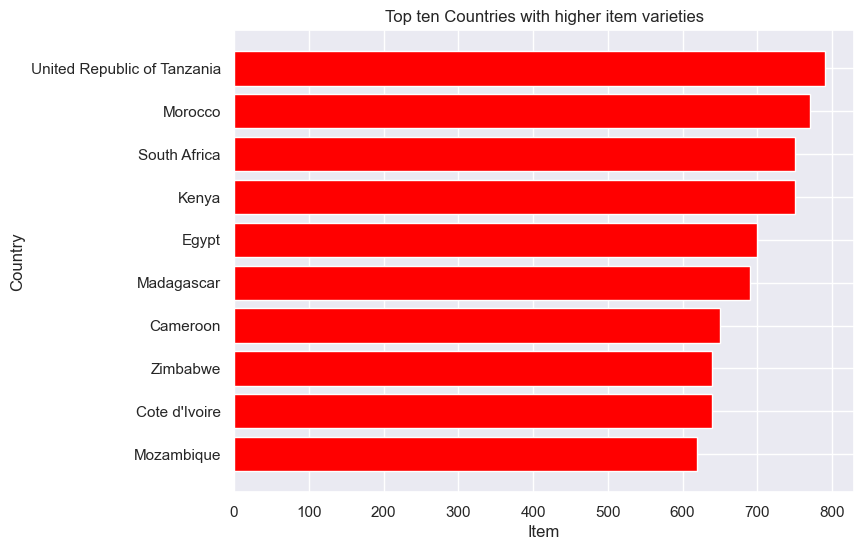

In [32]:
item_count = df_p.groupby('Country')['Item'].count().nlargest(10).sort_values(ascending = True).reset_index(name = 'count')
plt.figure (figsize = [8, 6])
plt.barh(item_count['Country'], item_count['count'], color = 'red')
plt.xlabel('Item')
plt.ylabel('Country')
plt.title('Top ten Countries with higher item varieties')
plt.show()

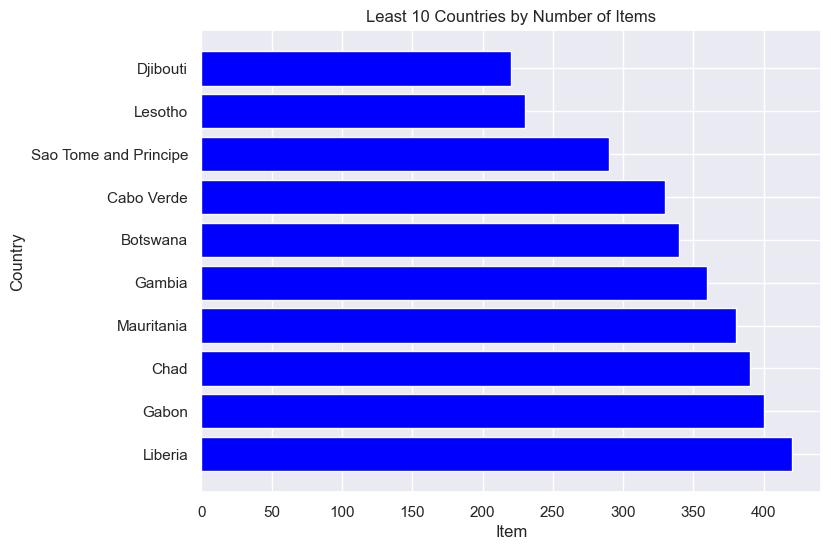

In [33]:
item_count = df_p.groupby('Country')['Item'].count().nsmallest(10).sort_values(ascending = False).reset_index(name = 'count')
plt.figure (figsize = [8, 6])
plt.barh(item_count['Country'], item_count['count'], color = 'blue')
plt.xlabel('Item')
plt.ylabel('Country')
plt.title('Least 10 Countries by Number of Items')
plt.show()

## Q3: What is the highest and least produced item?

In [15]:
item_qty = df_p.groupby('Item')['Value(kt)'].sum().sort_values(ascending=False)
print(item_qty)

Item
Cassava and products               1118948
Sugar cane                          887008
Maize and products                  574948
Yams                                511523
Vegetables, Other                   410403
Milk - Excluding Butter             380380
Sorghum and products                241080
Wheat and products                  229875
Beverages, Fermented                227037
Potatoes and products               221092
Plantains                           186775
Tomatoes and products               172192
Rice (Milled Equivalent)            156775
Millet and products                 155193
Bananas                             153785
Sweet potatoes                      145694
Fruits, Other                       140167
Roots, Other                        136266
Sugar (Raw Equivalent)               99546
Beer                                 92630
Sugar beet                           87130
Pulses, Other and products           87097
Oranges, Mandarines                  83898
Onions

                                                   Observation: we can find that cassava and products is the highest produced item while aquatic animals, others are the least produced items.

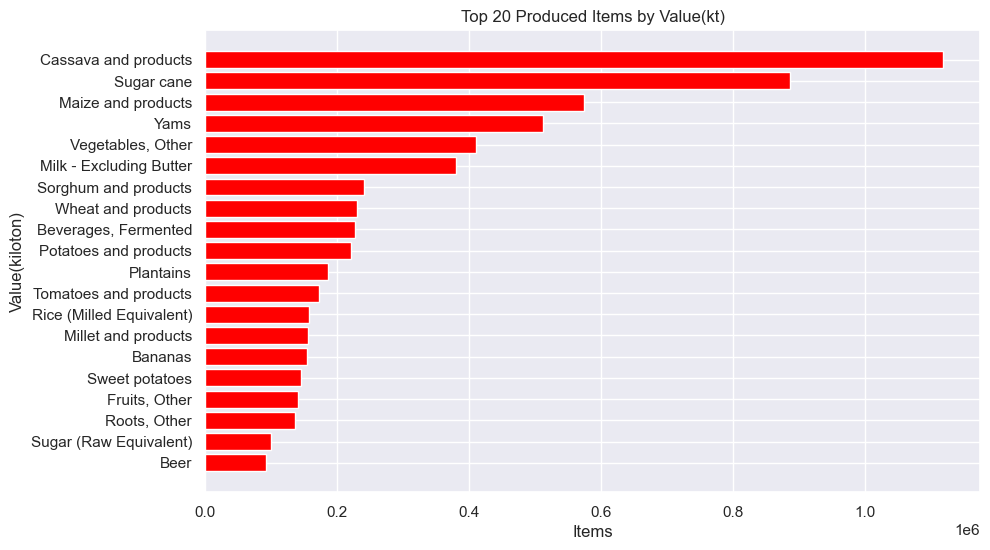

In [10]:
#visualize the top 20 producing items
item_qty = df_p.groupby('Item')['Value(kt)'].sum().nlargest(20).sort_values(ascending=True).reset_index(name='Value(kt)')
plt.figure(figsize=[10, 6])
plt.barh(item_qty['Item'], item_qty['Value(kt)'], color='red')
plt.xlabel('Items')
plt.ylabel('Value(kiloton)')
plt.title('Top 20 Produced Items by Value(kt)')
plt.savefig('mostproduced.png', bbox_inches='tight', dpi=300)
plt.show()

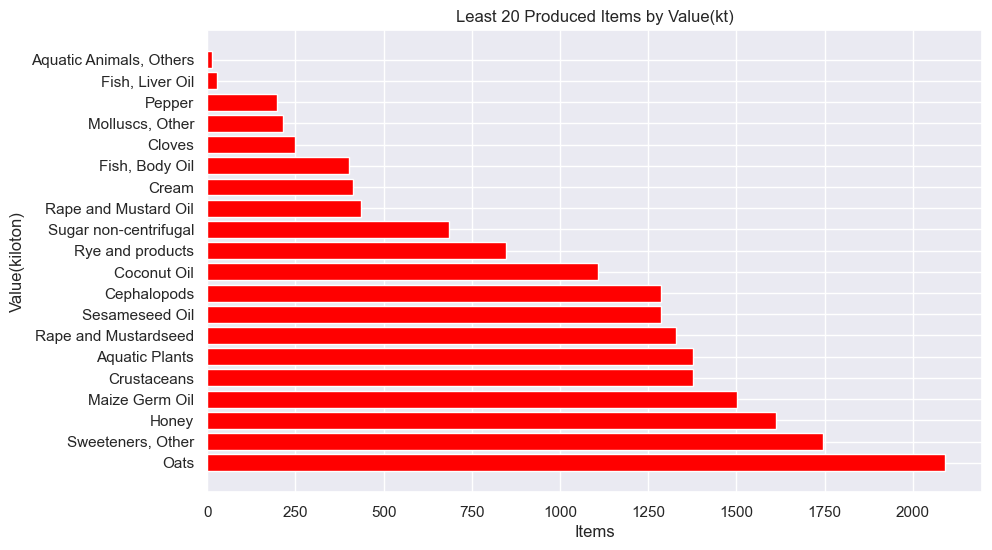

In [11]:
#visualize the least 20 producing items
item_qty = df_p.groupby('Item')['Value(kt)'].sum().nsmallest(20).sort_values(ascending=False).reset_index(name='Value(kt)')
plt.figure(figsize=[10, 6])
plt.barh(item_qty['Item'], item_qty['Value(kt)'], color='red')
plt.xlabel('Items')
plt.ylabel('Value(kiloton)')
plt.title('Least 20 Produced Items by Value(kt)')
plt.savefig('least.png', bbox_inches='tight', dpi=300)
plt.show()

## Q4:Does the number of country producing each specific item affect the production value of items?

In [35]:
df_p.groupby('Item')['Country'].nunique().sort_values(ascending=True)

Item
Cloves                              3
Rye and products                    3
Rape and Mustard Oil                4
Olive Oil                           4
Sugar non-centrifugal               4
Olives (including preserved)        4
Sugar beet                          5
Rape and Mustardseed                5
Cream                               6
Maize Germ Oil                      6
Alcohol, Non-Food                   8
Apples and products                 8
Wine                                8
Oats                                9
Sesameseed Oil                      9
Sweeteners, Other                   9
Grapes and products (excl wine)    10
Soyabean Oil                       11
Aquatic Plants                     12
Barley and products                14
Tea (including mate)               14
Dates                              14
Plantains                          15
Pepper                             15
Grapefruit and products            16
Fish, Liver Oil                    16
Coconut

                                    From the output above, we can find that cloves, olive oil, rye and products had few                                       countries producing them while items like Milk, Cassava, Vegetables had more countries                                         producing them which affected the production values

## Q5:what is the total production value of each unique country?

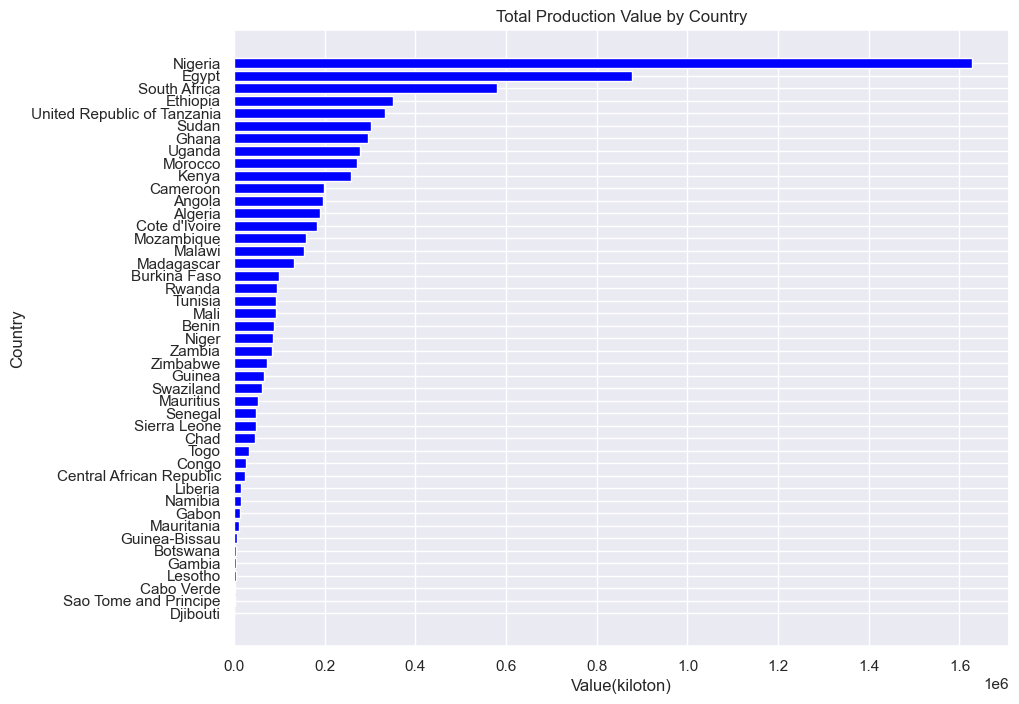

                        Country  Value_p
0                      Djibouti      666
1         Sao Tome and Principe     1152
2                    Cabo Verde     1658
3                       Lesotho     3785
4                        Gambia     4699
5                      Botswana     4808
6                 Guinea-Bissau     7296
7                    Mauritania    10039
8                         Gabon    13566
9                       Namibia    14197
10                      Liberia    14657
11     Central African Republic    24921
12                        Congo    25791
13                         Togo    32155
14                         Chad    45078
15                 Sierra Leone    47737
16                      Senegal    49414
17                    Mauritius    51785
18                    Swaziland    62665
19                       Guinea    66848
20                     Zimbabwe    73316
21                       Zambia    82701
22                        Niger    86808
23              

In [46]:
value_ = df_p.groupby('Country')['Value(kt)'].sum().sort_values(ascending = True).reset_index(name = 'Value_p')
plt.figure (figsize = [10, 8])
plt.barh(value_['Country'], value_['Value_p'], color='blue')
plt.xlabel('Value(kiloton)')
plt.ylabel('Country')
plt.title('Total Production Value by Country')
plt.savefig('prod.png', bbox_inches='tight', dpi=300)
plt.show()
print(value_)

Observation: Nigeria is the highest producing country by value followed by Egypt while the least producing country is Djibouti.

Let's visualize to get clearer view of the top and least 10 production country

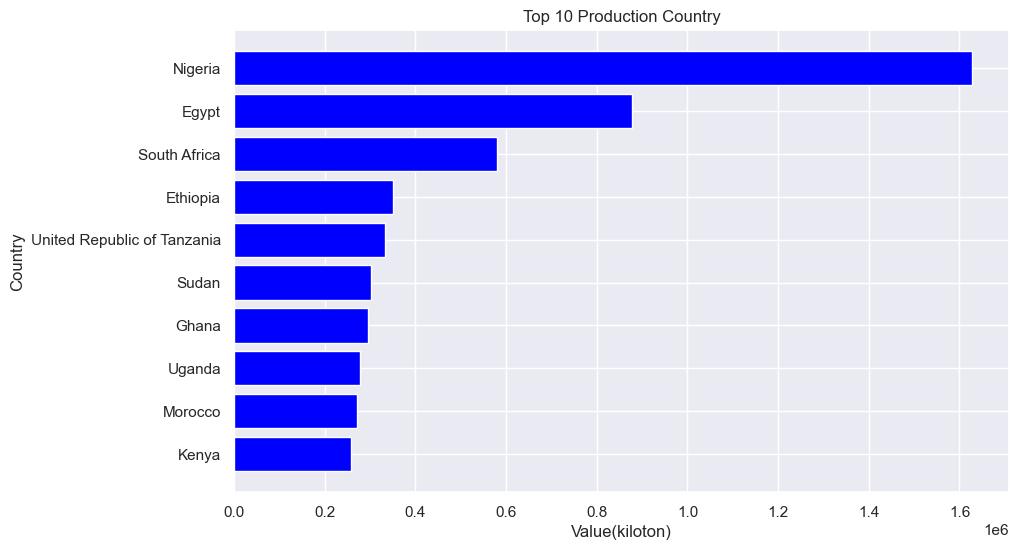

In [5]:
#visualize the top 10 highest production country
value_ = df_p.groupby('Country')['Value(kt)'].sum().nlargest(10).sort_values(ascending = True).reset_index(name = 'Value_p')
plt.figure (figsize = [10, 6])
plt.barh(value_['Country'], value_['Value_p'], color='blue')
plt.xlabel('Value(kiloton)')
plt.ylabel('Country')
plt.title('Top 10 Production Country')
plt.show()

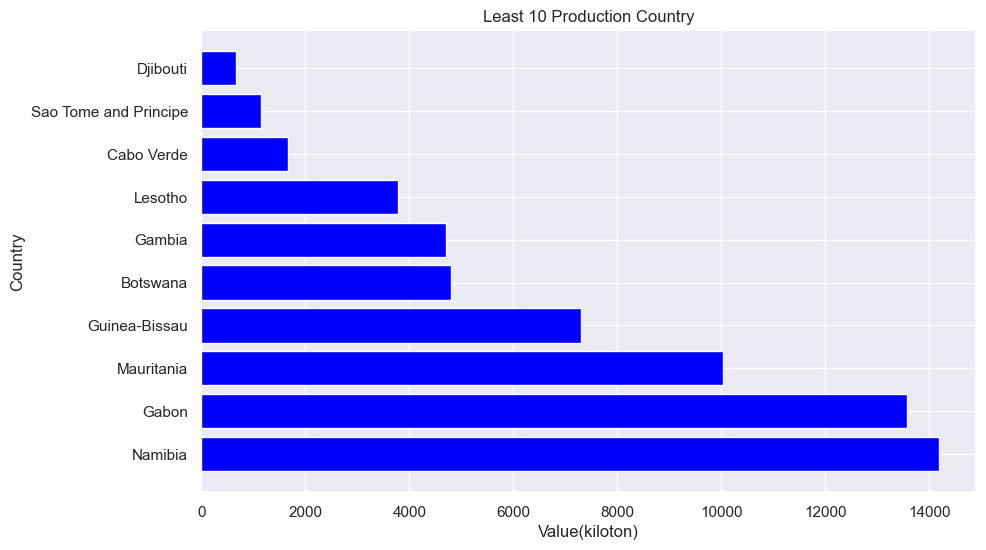

In [51]:
#visualize the least 10 producing country
value_ = df_p.groupby('Country')['Value(kt)'].sum().nsmallest(10).sort_values(ascending = False).reset_index(name = 'Value_p')
plt.figure (figsize = [10, 6])
plt.barh(value_['Country'], value_['Value_p'], color='blue')
plt.xlabel('Value(kiloton)')
plt.ylabel('Country')
plt.title('Least 10 Production Country')
plt.show()

### Q6: Does the food production data have any outlier (extreme values)?

In [33]:
#finding the average and median food production value between 2004-2013
average = df_p['Value(kt)'].mean()
median_ = df_p['Value(kt)'].median()
print('\nAverage:')
print(average)
print('\nMedian:')
print(median_)


Average:
327.7852012115967

Median:
18.0


In [6]:
#finding the first quantile
q1 = df_p.quantile(0.25) 
q1

Value(kt)    3.0
Name: 0.25, dtype: float64

In [8]:
#finding the 3rd quantile
q3 = df_p.quantile(0.75)
q3

Value(kt)    108.0
Name: 0.75, dtype: float64

In [9]:
#finding the interquatile range(IQR), we will have to subtract 1st quantile from 3rd quantile.
IQR = q3 - q1
IQR

Value(kt)    105.0
dtype: float64

In [10]:
#finding the lower fence using the q1 and IQR
lower_fence = q1 - (1.5 * IQR)
lower_fence

Value(kt)   -154.5
dtype: float64

In [11]:
#finding the upper fence using the q3 and IQR
upper_fence = q3 + (1.5 * IQR)
upper_fence

Value(kt)    265.5
dtype: float64

###### To find outliers from our food production, we would have to look at values that are bigger than the upper fence or smaller than the fence.

In [33]:
#check for countries greater than the upper fence or lower than the lower fence
np.logical_or(df_p['Value(kt)'] > 265.5, df_p['Value(kt)'] < -154.5)

0         True
1         True
2         True
3         True
4         True
         ...  
23105    False
23106    False
23107    False
23108    False
23109    False
Name: Value(kt), Length: 23110, dtype: bool

In [37]:
df_p[df_p['Value(kt)'] < -154.5].any()

Country      False
Item         False
Year         False
Value(kt)    False
dtype: bool

In [14]:
df_p[df_p['Value(kt)'] > 265.5].any()

Country      True
Item         True
Year         True
Value(kt)    True
dtype: bool

From the output above we can find that there are countries that produced higher than the upper fence which can be considered as outlier and there are no country that produced lower than the lower fence.

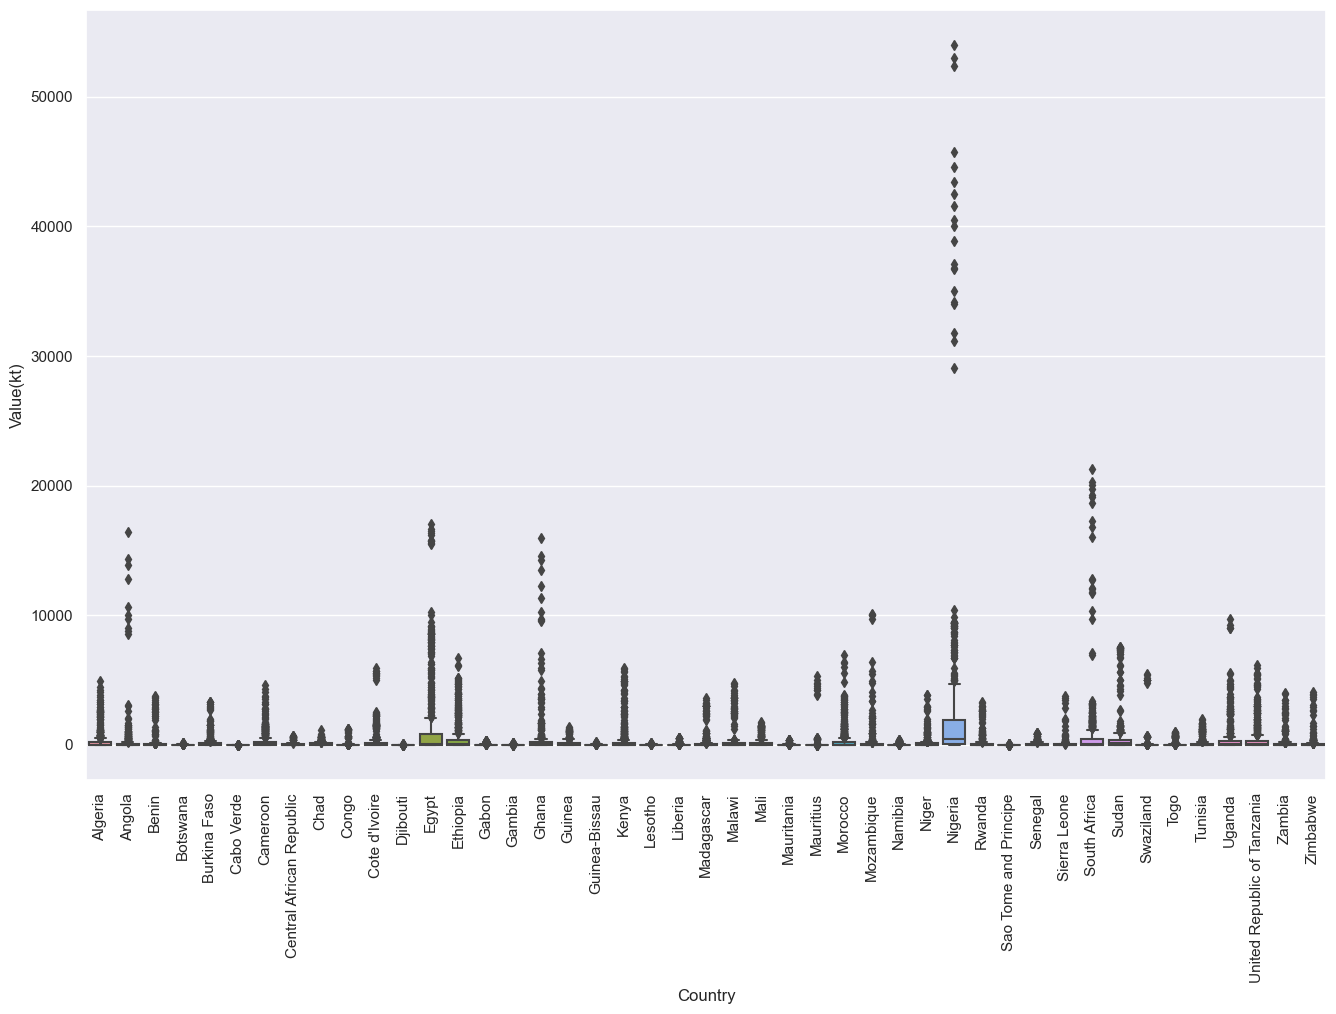

In [57]:
#let us visualize using a boxplot to get a view of these outliers.
plt.figure(figsize=[16, 10])
sns.boxplot(x = 'Country', y= 'Value(kt)', data = df_p)
plt.xticks(rotation=90)
plt.show()

We can see that this is too clustered, so we will separate the countries that had outliers which are greater than the upper fence from countries that didn't have any outlier so as to aid a proper view.

In [15]:
#convert outlier into dataframe so as to get the names of the outlier countries
outliers = pd.DataFrame(df_p[df_p['Value(kt)'] > 265.5])
outliers

,Country,Item,Year,Value(kt)
0,Algeria,Wheat and products,2004-01-01,2731
1,Algeria,Wheat and products,2005-01-01,2415
2,Algeria,Wheat and products,2006-01-01,2688
3,Algeria,Wheat and products,2007-01-01,2319
4,Algeria,Wheat and products,2008-01-01,1111
...,...,...,...,...
23085,Zimbabwe,Milk - Excluding Butter,2009-01-01,389
23086,Zimbabwe,Milk - Excluding Butter,2010-01-01,396
23087,Zimbabwe,Milk - Excluding Butter,2011-01-01,400
23088,Zimbabwe,Milk - Excluding Butter,2012-01-01,410


In [48]:
unique_ = outliers['Country'].unique()
uniqueN = outliers['Country'].nunique()
print(unique_)
print(uniqueN)

['Algeria' 'Angola' 'Benin' 'Burkina Faso' 'Cameroon'
 'Central African Republic' 'Chad' 'Congo' "Cote d'Ivoire" 'Egypt'
 'Ethiopia' 'Gabon' 'Ghana' 'Guinea' 'Kenya' 'Liberia' 'Madagascar'
 'Malawi' 'Mali' 'Mauritania' 'Mauritius' 'Morocco' 'Mozambique' 'Namibia'
 'Niger' 'Nigeria' 'Rwanda' 'Senegal' 'Sierra Leone' 'South Africa'
 'Sudan' 'Swaziland' 'Togo' 'Tunisia' 'Uganda'
 'United Republic of Tanzania' 'Zambia' 'Zimbabwe']
38


                                Observations: You can see we have 38 outlier countries out of the 45 unique countries we have in our dataset due to higher production value than the upper fence.

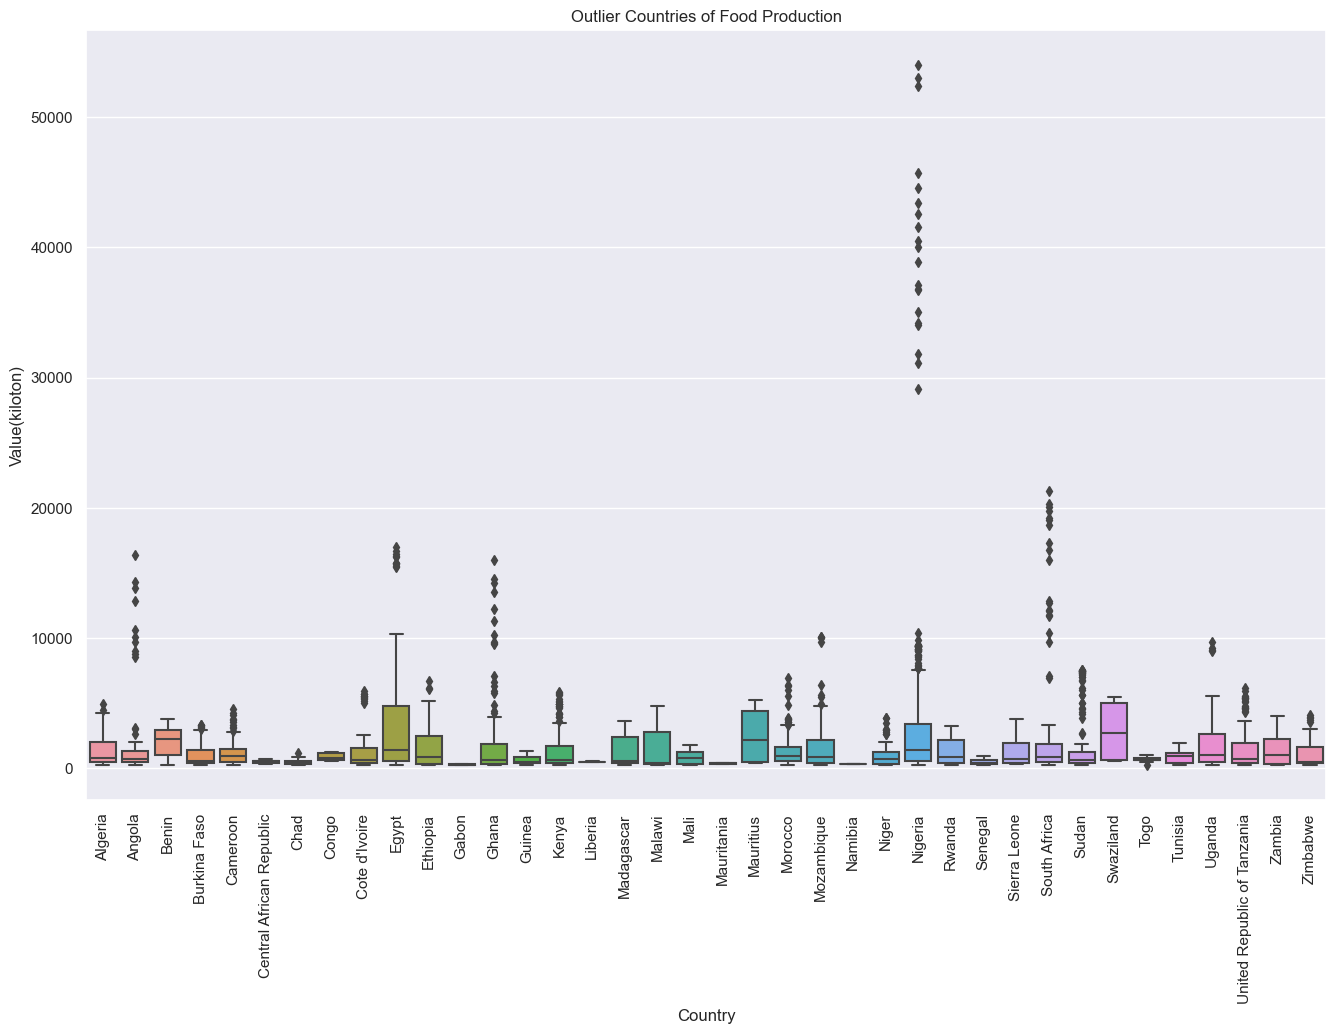

In [16]:
#let's visualize countries that have outliers using a boxplot
plt.figure(figsize=[16, 10])
sns.boxplot(x = 'Country', y= 'Value(kt)', data = outliers)
plt.xlabel('Country')
plt.ylabel('Value(kiloton)')
plt.title('Outlier Countries of Food Production')
plt.xticks(rotation=90)
plt.savefig('outlier.png', bbox_inches='tight', dpi=300)
plt.show()

                 OBSERVATIONS: From the output above, we can see there are 38 countries that produced consistently over time between 2004-2013. Country like Nigeria produced consistently and higher than every other countries.

## IMPORTING FOOD SUPPLY DATA

In [17]:
#read csv to dataframe
df_s = pd.read_csv('Africa Food Supply (2004 - 2013).csv')
df_s.head()

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048


In [5]:
#Inspecting dataframe
df_s.describe()

,Year,Value
count,450.000000,450.000000
mean,2008.500000,2469.775556
std,2.875478,379.140143
min,2004.000000,1781.000000
25%,2006.000000,2174.000000
50%,2008.500000,2376.000000
75%,2011.000000,2681.750000
max,2013.000000,3561.000000


In [6]:
df_s.nunique()

Country     45
Year        10
Value      373
dtype: int64

In [10]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  450 non-null    object
 1   Year     450 non-null    int64 
 2   Value    450 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.7+ KB


In [18]:
#converting year column to dataobject and identifying the value as kcal/person/day
df_s['Year'] = pd.to_datetime(df_p['Year'], format = '%Y')
df_s.rename(columns = {'Value': 'Value(kcal/person/day)'}, inplace = True)
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Country                 450 non-null    object        
 1   Year                    450 non-null    datetime64[ns]
 2   Value(kcal/person/day)  450 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 10.7+ KB


## Q1: What is the average supply over the years?

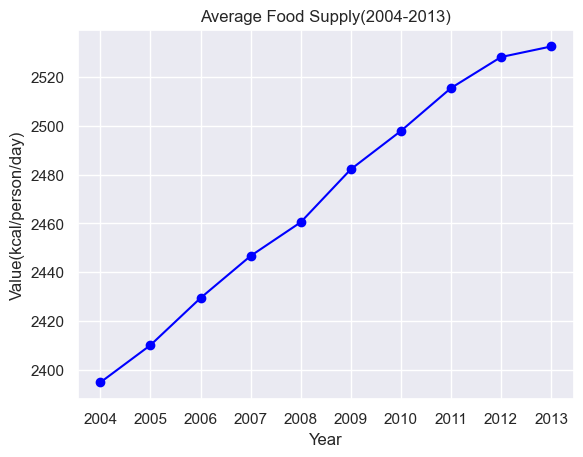

        Year        Value
0 2004-01-01  2394.888889
1 2005-01-01  2410.177778
2 2006-01-01  2429.466667
3 2007-01-01  2446.688889
4 2008-01-01  2460.466667
5 2009-01-01  2482.177778
6 2010-01-01  2497.866667
7 2011-01-01  2515.422222
8 2012-01-01  2528.133333
9 2013-01-01  2532.466667


In [19]:
supply = df_s.groupby('Year')['Value(kcal/person/day)'].mean().reset_index(name='Value')
plt.plot(supply['Year'], supply['Value'], marker = 'o', color='blue')
plt.xlabel('Year')
plt.ylabel('Value(kcal/person/day)')
plt.title('Average Food Supply(2004-2013)')
plt.savefig('supplytrend.png', bbox_inches='tight', dpi=300)
plt.show()
print(supply)

                  Observations: From the analysis above, we can observe that the food supply increased as years increase.

## Q2: Which country supplied the most food?

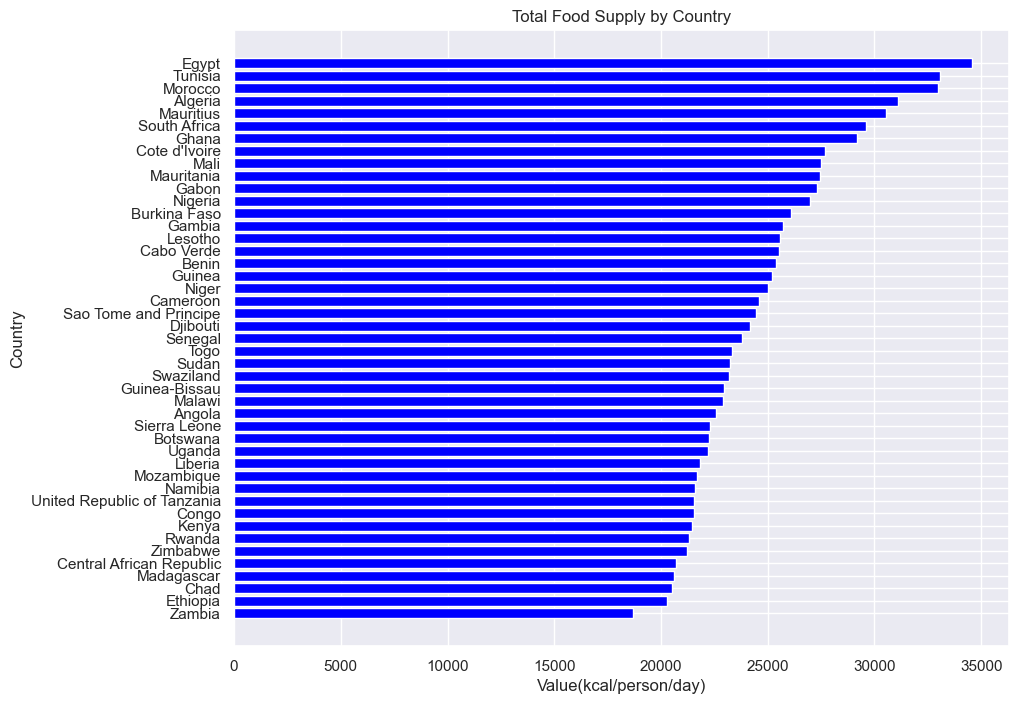

                        Country  Value
0                        Zambia  18701
1                      Ethiopia  20292
2                          Chad  20511
3                    Madagascar  20608
4      Central African Republic  20719
5                      Zimbabwe  21209
6                        Rwanda  21309
7                         Kenya  21453
8                         Congo  21530
9   United Republic of Tanzania  21550
10                      Namibia  21602
11                   Mozambique  21702
12                      Liberia  21827
13                       Uganda  22205
14                     Botswana  22263
15                 Sierra Leone  22291
16                       Angola  22556
17                       Malawi  22925
18                Guinea-Bissau  22963
19                    Swaziland  23171
20                        Sudan  23238
21                         Togo  23339
22                      Senegal  23784
23                     Djibouti  24165
24        Sao Tome and Pr

In [20]:
supply_c = df_s.groupby('Country')['Value(kcal/person/day)'].sum().sort_values(ascending = True).reset_index(name='Value')
plt.figure(figsize=[10, 8])
plt.barh(supply_c['Country'], supply_c['Value'], color = 'blue')
plt.xlabel('Value(kcal/person/day)')
plt.ylabel('Country')
plt.title('Total Food Supply by Country')
plt.savefig('countrysup.png', bbox_inches='tight', dpi=300)
plt.show()
print(supply_c)

                                        Observations: From the output above, Egypt supplied more food with 34580 kcal/person/day followed Tunisia while Zambia is the least with 18701.

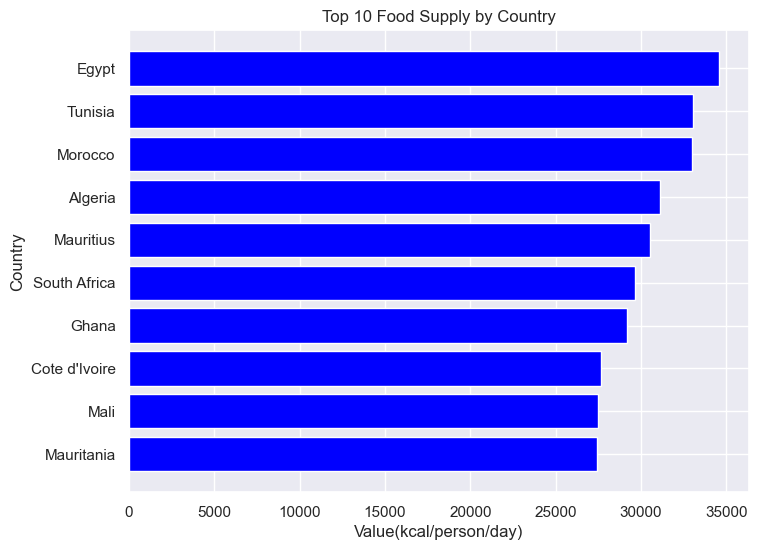

In [24]:
#lets visualize the top and least 10 countries that supplied the most to aid a clearer view.
supply_c = df_s.groupby('Country')['Value(kcal/person/day)'].sum().nlargest(10).sort_values(ascending = True).reset_index(name='Value')
plt.figure(figsize=[8, 6])
plt.barh(supply_c['Country'], supply_c['Value'], color = 'blue')
plt.xlabel('Value(kcal/person/day)')
plt.ylabel('Country')
plt.title('Top 10 Food Supply by Country')
plt.show()

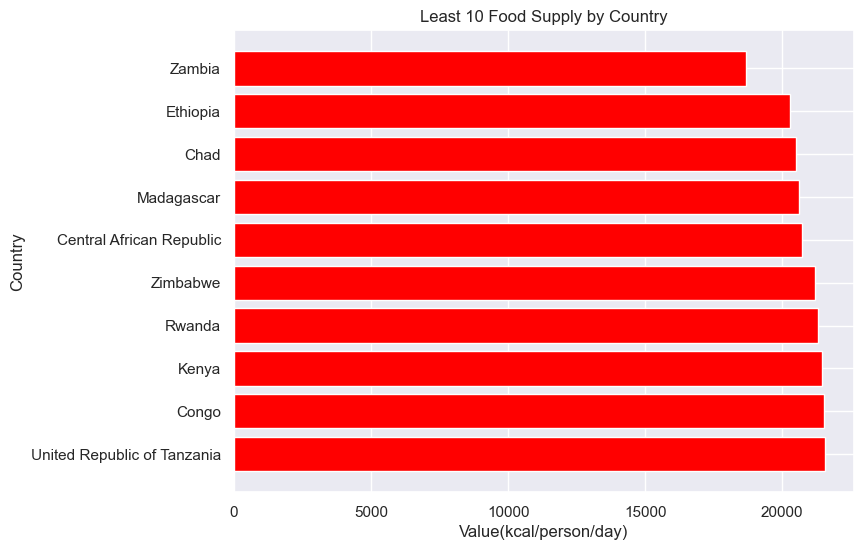

In [63]:
supply_c = df_s.groupby('Country')['Value(kcal/person/day)'].sum().nsmallest(10).sort_values(ascending = False).reset_index(name='Value')
plt.figure(figsize=[8, 6])
plt.barh(supply_c['Country'], supply_c['Value'], color = 'red')
plt.xlabel('Value(kcal/person/day)')
plt.ylabel('Country')
plt.title('Least 10 Food Supply by Country')
plt.show()

### Q3: Are there outlier country in the food supply/consumption data?

In [64]:
#find the mean and median 
average = df_s.mean()
med = df_s.median()
print('\nAverage:')
print(average)
print('\nMedian:')
print(med)


Average:
Value(kcal/person/day)    2469.775556
dtype: float64

Median:
Value(kcal/person/day)    2376.0
dtype: float64


In [65]:
#find the 1st quantile and the 3rd quantile
Q1 = df_s.quantile(0.25)
Q3 = df_s.quantile(0.75)
print('\nQ1:')
print(Q1)
print('\nQ3')
print(Q3)


Q1:
Value(kcal/person/day)    2174.0
Name: 0.25, dtype: float64

Q3
Value(kcal/person/day)    2681.75
Name: 0.75, dtype: float64


In [66]:
#find the interquantile range(IQR)
IQR = Q3 - Q1
IQR

Value(kcal/person/day)    507.75
dtype: float64

In [67]:
#find the lower and upper fence 
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)
print('\nlower_fence:')
print(lower)
print('\nupper_fence')
print(upper)


lower_fence:
Value(kcal/person/day)    1412.375
dtype: float64

upper_fence
Value(kcal/person/day)    3443.375
dtype: float64


In [69]:
#find countries lower than the lower fence
df_s[df_s['Value(kcal/person/day)'] < 1412.375].any()

Country                   False
Year                      False
Value(kcal/person/day)    False
dtype: bool

In [21]:
df_s[df_s['Value(kcal/person/day)'] > 3443.375].any()

Country                   True
Year                      True
Value(kcal/person/day)    True
dtype: bool

                Observations: From the output above, we find there are no countries lower than the lower fence whereas there are countries higher than the upper fence.

In [22]:
#let's get the countries that are greater than the upper fence.
outliers_s = pd.DataFrame(df_s[df_s['Value(kcal/person/day)'] > 3443.375])
outliers_s

,Country,Year,Value(kcal/person/day)
123,Egypt,2007-01-01,3445
124,Egypt,2008-01-01,3490
126,Egypt,2010-01-01,3507
127,Egypt,2011-01-01,3549
128,Egypt,2012-01-01,3561
129,Egypt,2013-01-01,3522


In [72]:
#get the unique country
outliers_s['Country'].nunique()

1

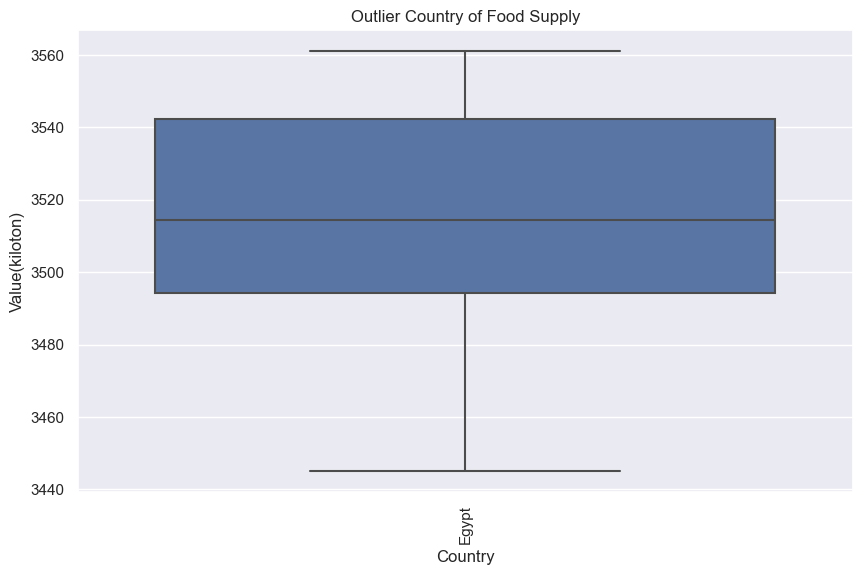

In [24]:
#let's visualize countries that have outliers using a boxplot
plt.figure(figsize=[10, 6])
sns.boxplot(x = 'Country', y= 'Value(kcal/person/day)', data = outliers_s)
plt.xlabel('Country')
plt.ylabel('Value(kiloton)')
plt.title('Outlier Country of Food Supply')
plt.xticks(rotation=90)
plt.savefig('outliersup.png', bbox_inches='tight', dpi=300)
plt.show()

Observations: From the above output, we can see it's only Egypt that supplied consistently over the period of 10 years.

### Q4: Does the country that produced higher also supply higher?

In [49]:
#let's compare
compare = pd.merge(value_, supply_c, on = 'Country', how = 'inner').sort_values(by = [], ascending = True)
compare

,Country,Value_p,Value
0,Djibouti,666,24165
1,Sao Tome and Principe,1152,24462
2,Cabo Verde,1658,25514
3,Lesotho,3785,25588
4,Gambia,4699,25695
5,Botswana,4808,22263
6,Guinea-Bissau,7296,22963
7,Mauritania,10039,27443
8,Gabon,13566,27299
9,Namibia,14197,21602


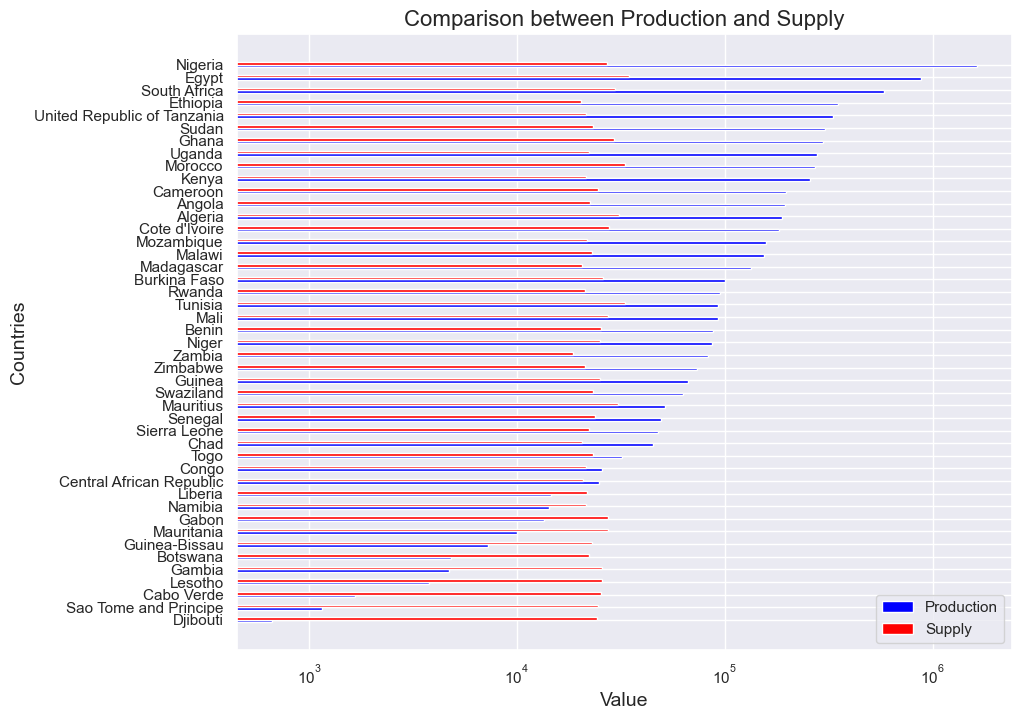

In [64]:
value_kt = compare['Value_p']
value_kcal = compare['Value']
y = np.arange(45)

plt.figure(figsize =[10,8])
width = 0.2
plt.barh(y-0.1, value_kt, width, color = 'blue', label = 'Production')
plt.barh(y+0.1, value_kcal, width, color = 'red', label = 'Supply')
plt.yticks(y, compare['Country'])
plt.xscale('log')

legend1 = plt.legend(loc= 'lower right')
# Create custom handles and labels for the second legend
line1, = plt.plot([], [], linestyle='-', color='blue')
line2, = plt.plot([], [], linestyle='-', color='red')
handles = [line1, line2]
labels = ['Supply', 'Production']

plt.xlabel('Value', fontsize = 14)
plt.ylabel('Countries', fontsize = 14)
plt.title('Comparison between Production and Supply', fontsize = 16)
plt.savefig('compare.png', bbox_inches='tight', dpi=300)
plt.show()

                           Observations: From the chart above,we can find that highest producing country is not the highest supplying country showing that food production wasn't well utilized.

###    OBSERVATIONS

1. We can find that as the year goes by, food production increased except in 2007 which had a dip and increased again in 2008.
2. We can find that countries that had higher food production didn't have higher food supply/consumption showing there was food shortage in those countries.
3. Egypt consistently had food supply which can be said that there was no shortage of food within those years 2004-2013.
4. Food items like cassava, sugar cane, maize and products, yams, vegetables, Milk-excluding butter were the highest produced items.
5. Food items like cloves, rye and products, aquatic animals and others were the least produced items.
6. Nigeria, Egypt, South africa were the highest producing countries .
7. We can find that food supply increased as the year increased.
8. Egypt, Tunisia, Morroco were the highest supplying countries.
9. We can see that some countries which produced higher food varieties didn't get to be high supplying country.
10. We can find that items with higher production value were produced by more than 20 countries to compare items with lower production value which were produced by less than 10 countries.
11. There were 38 countries that consistently produced in higher amount.